Has the network latency gone up since we switched internet service providers?
Is the website redesign any good?
Is our television ad driving more sales?

1.Answer with the type of test you would use (assume normal distribution):

    Is there a difference in grades of students on the second floor compared to grades of all students?

    Are adults who drink milk taller than adults who dont drink milk?

    Is the the price of gas higher in texas or in new mexico?

    Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

# is there a difference in grades of students on the second floor compared to grades of all students?
independent t-test

# Are adults who drink milk taller than adults who dont drink milk?
independent t-test

# Is the the price of gas higher in texas or in new mexico?
independent t-test

# Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
ANOVA

2.Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from scipy import stats
from env import host, username, password
a_sample = 40
b_sample = 50
a_mean = 90
b_mean = 100
a_std = 15
b_std = 20
alpha = .05
df_a = pd.DataFrame(np.random.normal(a_mean, a_std, a_sample))
df_b = pd.DataFrame(np.random.normal(b_mean, b_std, b_sample))

array([[<Axes: title={'center': '0'}>]], dtype=object)

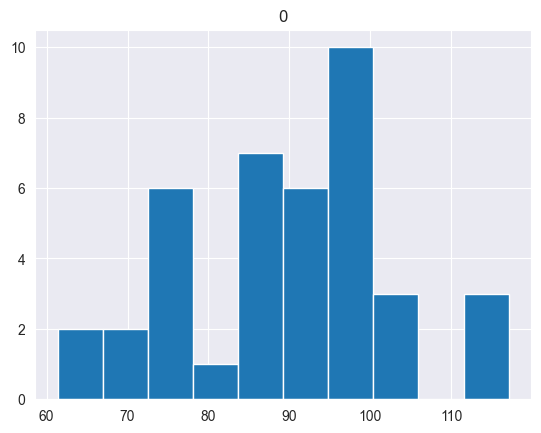

In [3]:
df_a.hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

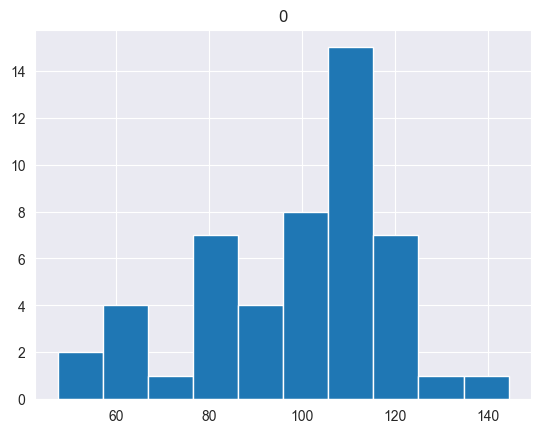

In [4]:
df_b.hist()

$H{o}$: office 1 and office 2 have the same average time to sell a home
$H{a}$: office 1 and office 2 do not have the same average time to sell a home

In [5]:
print(df_a.var())
print(df_b.var())

0    173.950372
dtype: float64
0    453.335503
dtype: float64


In [6]:
t, p = stats.ttest_ind(df_a, df_b, equal_var=False)
t, p

(array([-2.34028861]), array([0.02166285]))

In [7]:
print("is p/2 < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p < alpha? [ True]
is t > 0? [False]


In [8]:
if p < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis



3.Load the mpg dataset and use it to answer the following questions:

    Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [9]:
df_mpg = data('mpg')
df_mpg['average_mileage'] = (df_mpg.cty + df_mpg.hwy) / 2
df_mpg_1999 = df_mpg[df_mpg.year == 1999]
df_mpg_2008 = df_mpg[df_mpg.year == 2008]

$H{o}$: there is no difference in fuel-efficiency in cars from 1999 vs 2008
$H{a}$: there is a difference in fuel-efficiency in cars from 1999 vs 2008

In [10]:
print(df_mpg_1999.average_mileage.var())
print(df_mpg_2008.average_mileage.var())

27.122605363984682
24.097480106100797


In [11]:
t, p = stats.ttest_ind(df_mpg_1999.average_mileage, df_mpg_2008.average_mileage, equal_var=False)

In [12]:
print("is p < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p < alpha? False
is t > 0? True


In [13]:
if p/2 < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis


    Are compact cars more fuel-efficient than the average car?

In [14]:
df_mpg
df_compact = df_mpg[df_mpg['class'] == 'compact']

$H {o}$: compact cars are not more fuel-efficient than the average car
$H {a}$: compact cars are more fuel-efficient than the average car

In [15]:
print(df_compact.average_mileage.var())
print(df_mpg.average_mileage.var())

12.442876965772433
25.50542900113715


In [16]:
t, p = stats.ttest_1samp(df_compact.average_mileage, df_mpg.average_mileage.mean())
t, p

(7.896888573132533, 4.198563794317163e-10)

In [27]:
print("is p < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p/2 < alpha? True
is t > 0? True


In [25]:
if p < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis



    Do manual cars get better gas mileage than automatic cars?

In [19]:
df_manual = df_mpg[df_mpg["trans"].str.contains("manual")]
df_auto = df_mpg[df_mpg["trans"].str.contains("auto")]

$H {o}$: manual cars do not get better gas mileage than automatic cars
$H {a}$: manual cars get better gas mileage than automatic cars

In [20]:
print(df_manual.average_mileage.var())
print(df_auto.average_mileage.var())

26.635167464114826
21.942777233382337


In [21]:
t, p = stats.ttest_ind(df_manual.average_mileage, df_auto.average_mileage, equal_var=False)
t, p

(4.443514012903072, 1.7952248999917893e-05)

In [22]:
print("is p < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p < alpha? True
is t > 0? True


In [23]:
if p < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


1.Answer with the type of stats test you would use (assume normal distribution):
    Is there a relationship between the length of your arm and the length of your foot?
    Do guys and gals quit their jobs at the same rate?
    Does the length of time of the lecture correlate with a students grade?

#is there a relationship between the length of your arm and the length of your foot?
continuous

# do guys and gals quit their jobs at the same rate?
independent 2 tailed t-test

# does the length of time of the lecture correlate with a students grade?
continuous

2.Use the telco_churn data.
    Does tenure correlate with monthly charges?
    Total charges?
    What happens if you control for phone and internet service?

In [216]:
from env import host, username, password
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
def get_db_url(database):
    database = database
    url = f'mysql+pymysql://{username}:{password}@{host}/{database}'
    return url

In [231]:
# does tenure correlate with monthly charges?
# $h_{o}$: there is no correlation between tenure and monthly charges
# $h_{a}$: there is a correlation between tenure and monthly charges

pf = pd.read_sql('SELECT tenure, monthly_charges FROM customers', get_db_url('telco_churn'))
x=pf.tenure
y=pf.monthly_charges
r, p = stats.pearsonr(x, y)
r, p


(0.24789985628615024, 4.094044991499773e-99)

In [62]:
# does tenure correlate with total charges?
# $h_{o}$: there is no correlation between tenure and total charges
# $h_{a}$: there is a correlation between tenure and total charges
pf = pd.read_sql('SELECT tenure, total_charges FROM customers where total_charges is not null and tenure is not null', get_db_url('telco_churn'))
pf['total_charges'] = pd.to_numeric(pf['total_charges'], errors='coerce')
pf = pf.dropna()
x=pf.tenure
y=pf.total_charges
r, p = stats.pearsonr(x, y)
r, p

(0.8258804609332021, 0.0)

In [93]:
# what happens if you control for phone and internet service?
# $h_{o}$: there is no correlation between tenure and total charges
# $h_{a}$: there is a correlation between tenure and total charges
df_telco = pd.read_sql('select * from customers', get_db_url('telco_churn'))
df_telco['total_charges'] = pd.to_numeric(df_telco['total_charges'], errors='coerce')
df_telco['tenure'] = pd.to_numeric(df_telco['tenure'], errors='coerce')
df_telco = df_telco.dropna()
df_telco['internet_service_type_id'] = df_telco.internet_service_type_id.replace(1, True).replace(2, True).replace(3, False)
people_with_phone = df_telco[df_telco.phone_service == "Yes"]
people_without_phone = df_telco[df_telco.phone_service == "No"]
people_with_internet = df_telco[df_telco.internet_service_type_id ==  True]
people_without_internet = df_telco[df_telco.internet_service_type_id == False]
df_telco
x=people_with_phone.tenure
y=people_with_phone.total_charges
r, p = stats.pearsonr(x, y)
r, p

(0.829839321069941, 0.0)

In [102]:
x2 = people_with_internet.tenure
y2 = people_with_internet.total_charges
r, p = stats.pearsonr(x2, y2)
r, p


(0.9319346187418096, 0.0)

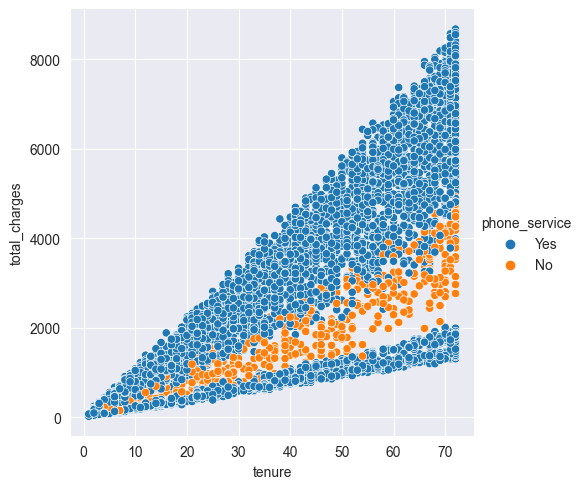

In [97]:
#plot
sns.relplot(x='tenure', y='total_charges', hue='phone_service', data=df_telco)

3.Use the employees database.
    Is there a relationship between how long an employee has been with the company and their salary?
    Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [223]:
from datetime import datetime as dt
# is there a relationship between how long an employee has been with the company and their salary?
# $h_{o}$: there is no correlation between tenure and salary
# $h_{a}$: there is a correlation between tenure and salary
pf = pd.read_sql("select distinct emp_no, min(from_date) from_date,max(to_date) to_date, avg(salary) salary from salaries where to_date < '9999-01-01' group by emp_no;", get_db_url('employees'))

In [224]:
pf

,emp_no,from_date,to_date,salary
0,10001,1986-06-26,2002-06-22,74540.8750
1,10002,1996-08-03,2001-08-02,68120.0000
2,10003,1995-12-03,2001-12-01,42983.5000
3,10004,1986-12-01,2001-11-27,55342.6000
4,10005,1989-09-12,2001-09-09,86657.7500
...,...,...,...,...
300019,499995,1997-06-02,2002-06-01,44496.4000
300020,499996,1996-05-13,2002-05-12,62073.0000
300021,499997,1987-08-30,2001-08-26,65264.0714
300022,499998,1993-12-27,2001-12-25,45623.3750


In [225]:
pf['from_date'] = pd.to_datetime(pf['from_date'])
pf['to_date'] = pd.to_datetime(pf['to_date'])

In [226]:
pf['tenure'] = (pf['to_date'] - pf['from_date'])
pf['tenure'] = pf['tenure'].dt.days
pf['tenure'] = pd.to_numeric(pf['tenure'], errors='coerce')
pf['tenure'] = pf['tenure']/365
pf = pf.dropna()
pf

,emp_no,from_date,to_date,salary,tenure
0,10001,1986-06-26,2002-06-22,74540.8750,16.0
1,10002,1996-08-03,2001-08-02,68120.0000,5.0
2,10003,1995-12-03,2001-12-01,42983.5000,6.0
3,10004,1986-12-01,2001-11-27,55342.6000,15.0
4,10005,1989-09-12,2001-09-09,86657.7500,12.0
...,...,...,...,...,...
300019,499995,1997-06-02,2002-06-01,44496.4000,5.0
300020,499996,1996-05-13,2002-05-12,62073.0000,6.0
300021,499997,1987-08-30,2001-08-26,65264.0714,14.0
300022,499998,1993-12-27,2001-12-25,45623.3750,8.0


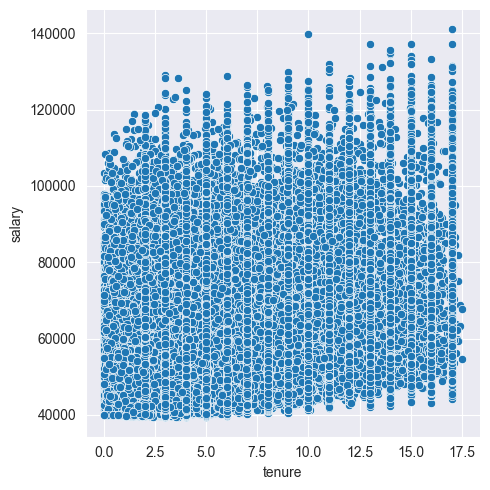

In [227]:
sns.relplot(x='tenure', y='salary', data=pf)


In [228]:
x = pf.tenure
y = pf.salary
r, p = stats.pearsonr(x, y)
r, p


(0.30135071746256936, 0.0)

In [228]:
# is there a relationship between how long an employee has been with the company and the number of titles they have had?
# $h_{o}$: there is no correlation between tenure and number of titles
# $h_{a}$: there is a correlation between tenure and number of titles




4.Use the sleepstudy data.
    Is there a relationship between days and reaction time?

In [232]:
from pydataset import data
df = data('sleepstudy')
df


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [ ]:
# is there a relationship between days and reaction time?
# $h_{o}$: there is no correlation between days and reaction time
# $h_{a}$: there is a correlation between days and reaction time

In [235]:
x = df.Days
y = df.Reaction
r, p = stats.spearmanr(x, y)
r, p

(0.5228138502259547, 5.132878057706873e-14)

TypeError: histplot() takes from 0 to 1 positional arguments but 2 were given